This repository's model_outcome.csv file contains the ficticious results of a classification model. The three fields included in the file are:

index : The unique ID of each observation.

class : The true class of each observation. The classes are binary (0 or 1).

predicted_prob : The model's estimate of probability that the observation belongs to class 1.

- Manually calculate the sensitivity and specificity of the model, using a predicted_prob threshold of greater than or equal to .5.
- Manually calculate the Area Under the Receiver Operating Characteristic Curve.
- Visualize the Receiver Operating Characterstic Curve.
- Email your finalized, completely reproducible .r or .py script to L.A. Care's Talent Acquisition Specialist, Jamessa Jones, at jjones@lacare.org.

In [1]:
import pandas as pd
df = pd.read_csv('model_outcome.csv')

In [2]:
df.head()

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118


Assuming 1 means its an outcome we want and 0 is the outcome we dont want, Convert predicted probability column into 1's and 0's based on the threshold
Create a column and group them based on statements TP FP TN FN
Find the frequency of each and then plug in the value into the sensitvity and specificity equation




In [3]:
df['prediction'] = df.predicted_prob.apply(lambda x : 1 if x>= 0.5 else 0)

In [4]:
# def classify(df,x,y):
#     for row in range(len(df)):
#         if (df.loc[row,x] == 1) & (df.loc[row,x] == df.loc[row,y]):
#             val = 'TP'
#         elif (df.loc[row,x] == 1) & (df.loc[row,x] != df.loc[row,y]):
#             val = 'FP'
#         elif (df.loc[row,x] == 0) & (df.loc[row,x] == df.loc[row,y]):
#             val = 'TN'
#         else:
#             val = 'FN'
#     return val

In [5]:
# df['classification'] = df.apply(classify, )

# np.where((df.col1==1) & (df.col1==df.col2), 'TP', 0)

In [6]:
# def create_threshold_columns(df):
#     TPR_list = []
#     FPR_list = [] 
#     for i in range(1,11):
#         threshold_i = i/10 
#         column = 'threshold_' + str(threshold_i)
#         classification_column = 'classification' + str(threshold_i)
#         df[column] = df.predicted_prob.apply(lambda x: 1 if x > threshold_i else 0)
# #       df[classifcation_column] = df[column].apply(lambda x: 'TP' if (df[column] == 1) & (df[column] == df['class']) else ('FP' if (df[column] == 1) & (df[column] != df['class']) else ('TN' if (df[column] == 0) & (df[column] == df['class']) else 'FN') ) )
        
#         #compare two columns, and create a new column based on the conditions of the two columns
        
#         df[classification_column] = df.apply(classify(df,column,'class'))

# #         TP = df.classification_column.value_counts()['TP']
# #         TN = df.classification_column.value_counts()['TN']
# #         FP = df.classification_column.value_counts()['FP']
# #         FN = df.classification_column.value_counts()['FN']
        
# #         FPR = FP/(FP + TN)
# #         TPR = TP/(TP +FN)
        
# #         TPR_list.append(TPR)
# #         FPR_list.append(FPR)
#         #df[]
#         #calculate TPR and FPR 

In [7]:
# create_threshold_columns(df)

In [8]:
df.head()

,index,class,predicted_prob,prediction
0,1,0,0.592837,1
1,2,1,0.624829,1
2,3,0,0.073848,0
3,4,1,0.544891,1
4,5,0,0.015118,0


In [9]:
def classify(df):
    if (df['prediction'] == 1) & (df['prediction'] == df['class']):
        val = 'TP'
    elif (df['prediction'] == 1) & (df['prediction'] != df['class']):
        val = 'FP'
    elif (df['prediction'] == 0) & (df['prediction'] == df['class']):
        val = 'TN'
    else:
        val = 'FN'
    return val

In [10]:
df['classification'] = df.apply(classify , axis=1)

In [11]:
df.classification.value_counts()

TP    402
TN    385
FP    123
FN     90
Name: classification, dtype: int64

In [12]:
df.prediction.value_counts()

1    525
0    475
Name: prediction, dtype: int64

In [13]:
# TP = df.classification.value_counts()['TP']
# TN = df.classification.value_counts()['TN']
# FP = df.classification.value_counts()['FP']
# FN = df.classification.value_counts()['FN']


In [14]:
TP = (df['classification'] == 'TP').sum() 
TN = (df['classification'] == 'TN').sum()
FP = (df['classification'] == 'FP').sum()
FN = (df['classification'] == 'FN').sum()

In [15]:
Sensitivity = TP / (TP + FN)
Specificity = TN / (FP + TN)

In [16]:
Sensitivity

0.8170731707317073

In [17]:
Specificity 

0.7578740157480315

In [18]:
FPR = FP/(FP + TN)
TPR = TP/(TP +FN)

In [19]:
FPR

0.2421259842519685

In [20]:
TPR

0.8170731707317073

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [23]:
df.head()

,index,class,predicted_prob,prediction,classification
0,1,0,0.592837,1,FP
1,2,1,0.624829,1,TP
2,3,0,0.073848,0,TN
3,4,1,0.544891,1,TP
4,5,0,0.015118,0,TN


In [24]:
# Create training and test sets
X = df.drop(columns = ['class', 'prediction','classification'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [25]:
r = RandomForestClassifier()
r.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
probs = r.predict_proba(X_test)

In [27]:
probs

array([[1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.3, 0.7],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.7, 0.3],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0.2, 0.8],
       [0. , 1. ],
       [0.3, 0.7],
       [0.1, 0.9],
       [1. ,

In [28]:
probs = probs[:, 1]

In [29]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.78


In [30]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

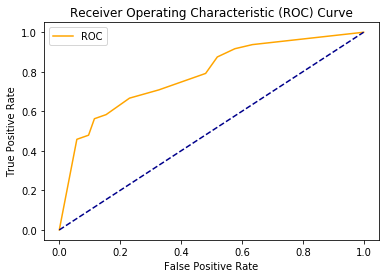

In [31]:
plot_roc_curve(fpr, tpr)